In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
 raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab4')

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Mounted at /content/drive


In [3]:
# загрузка датасета
from keras.datasets import imdb
vocabulary_size = 5000
index_from = 3
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=vocabulary_size,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=7,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=index_from
                                                      )
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shape of X train: (25000,)
Shape of y train: (25000,)
Shape of X test: (25000,)
Shape of y test: (25000,)


In [4]:
# создание словаря для перевода индексов в слова
# заргузка словаря "слово:индекс"
word_to_id = imdb.get_word_index()
# уточнение словаря
word_to_id = {key:(value + index_from) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
# создание обратного словаря "индекс:слово"
id_to_word = {value:key for key,value in word_to_id.items()}

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [5]:
#Вывод отзыва из обучающего множества в виде списка индексов слов
some_number = 192
review_indices = X_train[some_number]
print("Список индексов слов:")
print(review_indices)

#Преобразование списка индексов в текст
review_as_text = ' '.join(id_to_word[id] for id in X_train[some_number])
print("\nОтзыв в виде текста:")
print(review_as_text)



Список индексов слов:
[1, 225, 164, 433, 74, 2753, 35, 2188, 20, 5, 397, 35, 298, 20, 585, 305, 10, 10, 45, 64, 61, 652, 21, 6, 52, 708, 9, 2, 725, 4, 2, 7, 1451, 1089, 105, 17, 230, 17, 2, 9, 1947, 4, 3238, 11, 135, 422, 26, 6, 2, 1021, 378, 1780, 224, 472, 36, 26, 379, 724, 2607, 387, 178, 1582, 4, 771, 36, 2, 112, 2, 34, 6, 2, 10, 10, 300, 103, 6, 2, 2, 8, 516, 25, 30, 252, 8, 376, 90, 51, 1455, 335, 4010, 33, 54, 25, 2440, 90, 125, 10, 10, 241, 1559, 4, 609, 46, 7, 4, 2, 11, 3826, 2, 5, 11, 1011, 7, 4193, 7, 4684, 2, 3498, 90, 8, 3534, 2, 7, 4779, 10, 10, 342, 92, 1414, 979, 4, 568, 44, 4, 2, 5, 331, 2237, 18, 57, 684, 52, 282, 15, 4, 1788, 71, 2, 34, 90, 10, 10, 470, 137, 269, 8, 1090, 387, 129, 761, 46, 7, 129, 1682, 17, 76, 17, 614, 8, 2, 15, 4, 2, 2, 41, 10, 10, 457, 103, 397, 339, 39, 294, 8, 169, 4, 2, 103, 2, 129, 322, 30, 252, 8, 2222, 98, 245, 17, 515, 17, 614, 38, 25, 70, 393, 90, 31, 23, 31, 57, 213, 11, 112, 2, 208, 10, 10, 150, 474, 115, 535, 15, 101, 415, 62, 30, 2, 8

In [6]:
#Вывод длины отзыва
max_review_length = len(max(X_train, key=len))
print(f"\nМаксимальная длина отзыва: {max_review_length}")
min_review_length = len(min(X_train, key=len))
print(f"\nМинимальная длина отзыва: {min_review_length}")
review_length = len(review_indices)
print(f"\nДлина отзыва: {review_length}")


Максимальная длина отзыва: 2494

Минимальная длина отзыва: 11

Длина отзыва: 502


In [7]:
#Вывод метки и названия класса
class_label = y_train[some_number]
class_name = "Positive" if class_label == 1 else "Negative"
print(f"\nМетка класса: {class_label} - {class_name}")


Метка класса: 0 - Negative


In [12]:
# предобработка данных
from tensorflow.keras.utils import pad_sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words, value=0, padding='pre', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_words, value=0, padding='pre', truncating='post')

In [13]:
#Вывод отзыва из обучающего множества в виде списка индексов слов
some_number = 192
review_indices = X_train[some_number]
print("Список индексов слов:")
print(review_indices)

#Преобразование списка индексов в текст
review_as_text = ' '.join(id_to_word[id] for id in X_train[some_number])
print("\nОтзыв в виде текста:")
print(review_as_text)

Список индексов слов:
[   1  225  164  433   74 2753   35 2188   20    5  397   35  298   20
  585  305   10   10   45   64   61  652   21    6   52  708    9    2
  725    4    2    7 1451 1089  105   17  230   17    2    9 1947    4
 3238   11  135  422   26    6    2 1021  378 1780  224  472   36   26
  379  724 2607  387  178 1582    4  771   36    2  112    2   34    6
    2   10   10  300  103    6    2    2    8  516   25   30  252    8
  376   90   51 1455  335 4010   33   54   25 2440   90  125   10   10
  241 1559    4  609   46    7    4    2   11 3826    2    5   11 1011
    7 4193    7 4684    2 3498   90    8 3534    2    7 4779   10   10
  342   92 1414  979    4  568   44    4    2    5  331 2237   18   57
  684   52  282   15    4 1788   71    2   34   90   10   10  470  137
  269    8 1090  387  129  761   46    7  129 1682   17   76   17  614
    8    2   15    4    2    2   41   10   10  457  103  397  339   39
  294    8  169    4    2  103    2  129  322   30  252

In [14]:
#Вывод длины отзыва
max_review_length = len(max(X_train, key=len))
print(f"\nМаксимальная длина отзыва: {max_review_length}")
min_review_length = len(min(X_train, key=len))
print(f"\nМинимальная длина отзыва: {min_review_length}")
review_length = len(review_indices)
print(f"\nДлина отзыва: {review_length}")


Максимальная длина отзыва: 500

Минимальная длина отзыва: 500

Длина отзыва: 500


In [15]:
# вывод данных
print('X train: \n',X_train)
print('X train: \n',X_test)

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of X test:', X_test.shape)

X train: 
 [[   0    0    0 ...  104  545    7]
 [   0    0    0 ...    2  262  372]
 [   0    0    0 ...  758   10   10]
 ...
 [   0    0    0 ...    2   27  375]
 [   0    0    0 ...   11  111  531]
 [   0    0    0 ...  152 1833   12]]
X train: 
 [[   0    0    0 ...    2  126 3849]
 [   0    0    0 ...   25 1833   12]
 [   0    0    0 ...  129  249 4262]
 ...
 [   0    0    0 ...    2   24 1178]
 [   0    0    0 ...   61  278  145]
 [   0    0    0 ...   12    5  358]]
Shape of X train: (25000, 500)
Shape of X test: (25000, 500)


In [17]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32, input_length=max_words, input_shape=(max_words,)))
model.add(layers.LSTM(76))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 76)             │        33,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 76)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,213 (754.74 KB)

 Trainable params: 193,213 (754.74 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
batch_size = 64
epochs = 5
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.6543 - loss: 0.5985 - val_accuracy: 0.8430 - val_loss: 0.3728
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8699 - loss: 0.3238 - val_accuracy: 0.8742 - val_loss: 0.3080
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8501 - loss: 0.3290 - val_accuracy: 0.8256 - val_loss: 0.3999
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8745 - loss: 0.3161 - val_accuracy: 0.8616 - val_loss: 0.3363
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9138 - loss: 0.2272 - val_accuracy: 0.8718 - val_loss: 0.3244


In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc}")
print(f"\nTest loss: {test_loss}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8669 - loss: 0.3332

Test accuracy: 0.8670799732208252

Test loss: 0.3307616412639618


In [22]:
y_score = model.predict(X_test)
y_pred = [1 if y_score[i,0]>=0.5 else 0 for i in range(len(y_score))]
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1], target_names=['Negative', 'Positive']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
              precision    recall  f1-score   support

    Negative       0.86      0.88      0.87     12500
    Positive       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



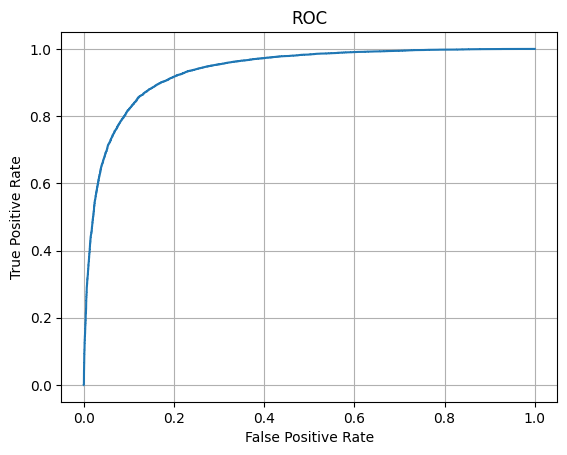

Area under ROC is 0.936850272


In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under ROC is', auc(fpr, tpr))

In [24]:
from sklearn.metrics import roc_auc_score
print('AUC ROC:', roc_auc_score(y_test, y_score))

AUC ROC: 0.936850272
